# Covariance and Correlation

**Overview**
This exercise is an introduction to correlation and covariance matrix.
The exercise will guide:
- Understanding of what **covariance** and **correlation** are.
- Implementation of both matrices using basic NumPy operations.
- Interpreting the meaning of these matrices in terms of variable relationships.


In data analysis and machine learning, understanding the relationships between variables is crucial.

Two key tools for this are the **covariance** and **correlation** matrices.
Recall the definitions: 

$$
\text{Covariance: }\newline  \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$

$$\text{ }\newline$$

$$
\text{Correlation: } \newline   \text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$
The cell below defines a synthetic dataset containing 4 features, the data could resemble _height_, _weight_, _age_ and _shoe size_ of a set of people. 

---
**Task 1 (medium): Reflect on theory💡📽️**
1. Explain the key characteristics of covariance and correlation. Use the following questions to guide your explanation.    - What does each one assess?
    - How do they describe relationships between variables differently?
    - Why might you prefer one measure over the other in analysis?
    - What does a covariance of zero mean? Does it imply independence?
    - Why are the diagonal elements of the covariance matrix always the variances of the variables?
    - Why are the diagonal elements of the correlation matrix always equal to 1?
    - What does the sign of a covariance or correlation value tell us?
    - Can two variables be strongly related but have a correlation close to zero? Under what circumstances?




---

In [0]:
#Write your reflections here...
"""
correlation is just a scaled version of covariance. The covariance matrix describes wether variables have a meaningful relationship to eachother, the 
covarience has a major flaw that being if one of the variables has a much higher variance than the other the covariance can be skeewed by this. The correlation
caps the values that the  variance is allowed to have between -1 and 1 this ensure we don't have the same scaling issue. A covarience of 0 means the vectors
are orthogonal (no relationship), close to zero would thus mean they have a non-meaningful relationship. Higher values mean a more meaningful relationship.
The reason that the diagonals are the varience of the variables is because when you use Cov(X,X) it turns into the varience formular.
The reason why the diagonals in the correlation matrix is 1 is because you divide the varience by the varience.
The two variables can have a strong relation but have a small correlation if the relationship between the two variables does not follow a linear relation.
"""


---
**Task 2 (easy): Generate data👩‍💻**
1. Run the cell below to load the data.


---

In [1]:
import numpy as np
import pandas as pd
import util_corr_cov

data = {
    'Height': [150, 155, 160, 165, 170, 175, 180, 185, 190, 195],
    'Weight': [50, 53, 57, 60, 65, 70, 72, 75, 78, 80],
    'Age':    [21, 22, 23, 26, 27, 28, 30, 23, 25, 31],
    'Shoe_Size': [36, 37, 38, 39, 40, 41, 42, 41, 42, 39]
}

df = pd.DataFrame(data)
X = df.values
df

,Height,Weight,Age,Shoe_Size
0,150,50,21,36
1,155,53,22,37
2,160,57,23,38
3,165,60,26,39
4,170,65,27,40
5,175,70,28,41
6,180,72,30,42
7,185,75,23,41
8,190,78,25,42
9,195,80,31,39



---
**Task 3 (easy): Calculate 1👩‍💻**
1. Complete the functions `covariance_matrix`
 and `correlation_matrix`
.

**Important**
It is not allowed to use built-in covariance/correlation functions.




---

In [33]:
def covariance_matrix(X):
    """
    Computes the covariance matrix manually.

    Parameters
    ----------
    X : numpy.ndarray, shape (n_samples, n_features)

    Returns
    -------
    cov_matrix : numpy.ndarray, shape (n_features, n_features)
        A square matrix representing the covariance between each pair of variables.
    """
    # Write your code here
    cov = np.zeros(shape=(len(X[0]), len(X[0])))
    for x in range(len(X[0])):
        x_sli = X[:, x]
        x_mean = np.mean(x_sli)
        for y in range(len(X[0])):
            y_sli = X[:,y]
            y_mean = np.mean(y_sli)
            cov[x,y] = ((x_sli - x_mean)@(y_sli-y_mean))/(len(X)-1)
    
    return cov
            

    


def correlation_matrix(X):
    """
    Computes the correlation matrix manually using the covariance matrix.

    Parameters
    ----------
    X : numpy.ndarray, shape (n_samples, n_features)

    Returns
    -------
    corr_matrix : numpy.ndarray, shape (n_features, n_features)
        A square matrix representing the correlation between each pair of variables.
    """
    # Write your code here
    cov_x = covariance_matrix(X)
    core = np.zeros(shape=(len(X[0]), len(X[0])))
    for x in range(len(X[0])):
        x_lie = X[:,x]
        x_mean = np.mean(x_lie)
        x_var = np.sqrt(((x_lie - x_mean)@(x_lie-x_mean))/(len(X) - 1))
        for y in range(len(X[0])):
            y_lie = X[:,y]
            y_mean = np.mean(y_lie)
            y_var = np.sqrt(((y_lie - y_mean)@(y_lie-y_mean))/(len(X) -1))
            core[x,y] = cov_x[x,y]/(x_var * y_var)

    return core



---
**Task 4 (easy): Calculate 2👩‍💻**
1. Run the cell below to calculate and visualize the covariance and correlation matrix.


---

Covariance Matrix:
 [[229.16666667 160.          34.44444444  24.16666667]
 [160.         112.88888889  24.55555556  18.        ]
 [ 34.44444444  24.55555556  11.6          4.        ]
 [ 24.16666667  18.           4.           4.27777778]]

Correlation Matrix:
 [[1.         0.99476079 0.66805846 0.77184824]
 [0.99476079 1.         0.6785708  0.81910164]
 [0.66805846 0.6785708  1.         0.56783465]
 [0.77184824 0.81910164 0.56783465 1.        ]]


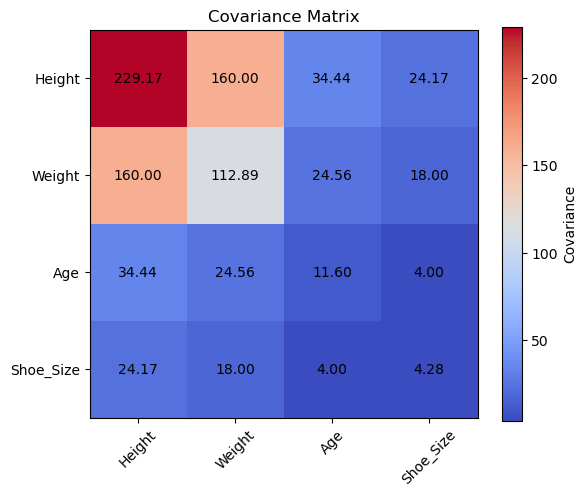

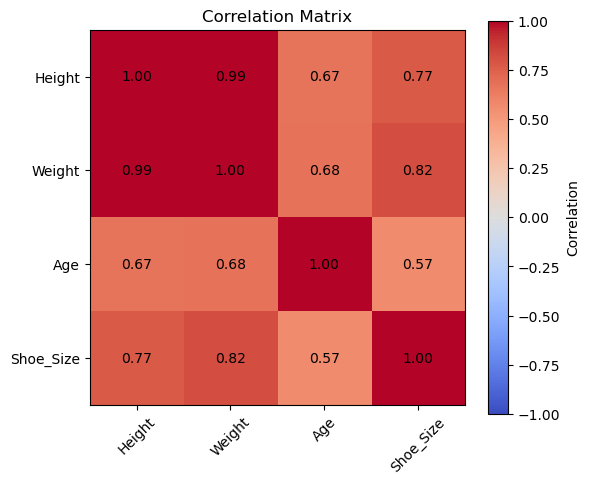

In [34]:
cov_mat = covariance_matrix(X)
print("Covariance Matrix:\n", cov_mat)

corr_mat = correlation_matrix(X)
print("\nCorrelation Matrix:\n", corr_mat)

util_corr_cov.plot_cov(df, cov_mat)
util_corr_cov.plot_corr(df, corr_mat)


---
**Task 5 (medium): Reflection💡📽️**
Reflect on the results. Use the following questions to guide your reflection:
1. Look at your covariance matrix. Which variables have the largest variances? What does that tell you?
2. Which pairs of variables have the highest positive covariance or correlation?
3. Which pairs show negative or near-zero relationships? What might that indicate?
4. Do the results align with what you expected from the dataset?
5. Compare your covariance and correlation matrices:
6. How do the magnitudes of the numbers differ?
7. What stays consistent between them?
8. Why might correlation be a more useful comparison measure when variables are in different units or scales?
9. If two variables have a high covariance but a low correlation, what might that suggest about the scales or units involved?


---

In [0]:
#Write your reflections here...
"""
Height and weight
Height and weight (cor and cov), shoe_size and height (cor), weight and shoe_size (cor)
No
Yes
Compared
Big
Height and height it big. 
Its still symmetric
They are scalled to a common range instead of having one overpower the other (power dynamics wack yo)
Big diff between the values in the covarience matrix but the cor fucks that up yo
"""